In [1]:
#!pip install yfinance
#!pip install yahoofinancials

import pandas as pd
import yfinance as yf


solana = yf.download('SOL-USD',
                      start='2019-01-01',
                      end='2024-12-29',
                      progress=False,
)
solana.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD,SOL-USD
Date,,,,,,
2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,87364276
2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,43862444
2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,38736897
2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,18211285
2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,16747614


In [2]:
#Close price data
closing_price = solana[['Close']]

In [3]:
closing_price['Close']

Ticker,SOL-USD
Date,
2020-04-10,0.951054
2020-04-11,0.776819
2020-04-12,0.882507
2020-04-13,0.777832
2020-04-14,0.661925
...,...
2024-12-24,196.989029
2024-12-25,197.479080
2024-12-26,188.218109


In [4]:
import matplotlib.pyplot as plt

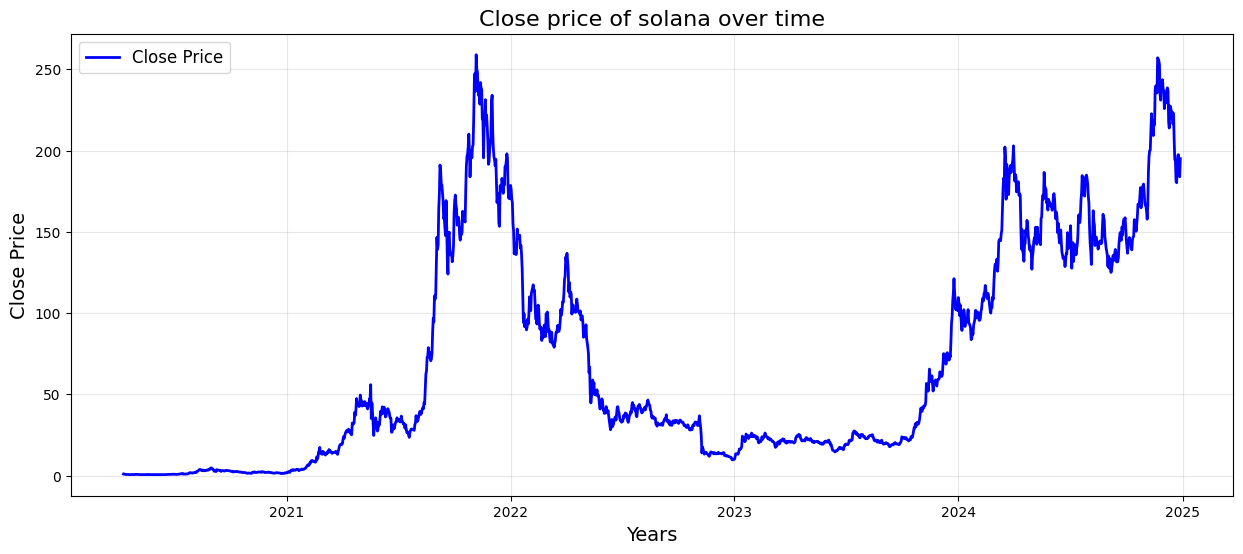

In [5]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of solana over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [6]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [7]:
df1 = pd.DataFrame(temp_data)

In [8]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [9]:
for i in range(2019, 2025):
    print(i, list(solana.index.year).count(i))

2019 0
2020 266
2021 365
2022 365
2023 365
2024 363


In [10]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-10-63837559cb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-10-63837559cb05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


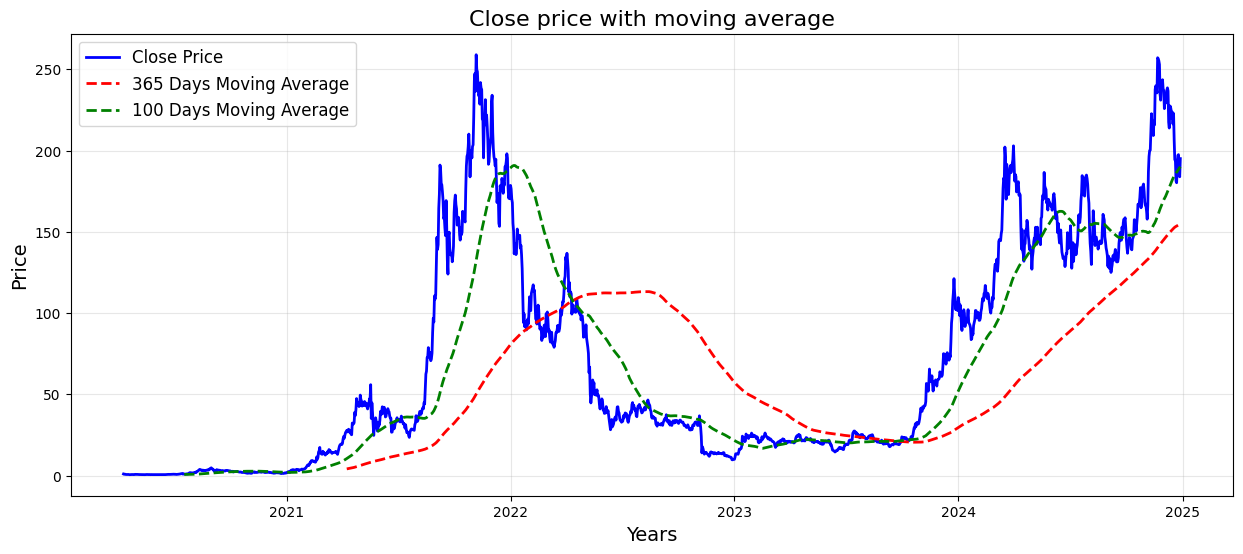

In [11]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [13]:
len(scaled_data)

1724

In [14]:
import numpy as np

In [15]:
# Prepare data
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
x_data = x_data.reshape(1624, 100)
y_data = np.array(y_data)

In [16]:
x_data.shape

(1624, 100)

In [17]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [18]:
x_train.shape

(1461, 100)

In [19]:
x_train[0]

array([1.68633464e-03, 1.01210036e-03, 1.42107963e-03, 1.01602027e-03,
       5.67497021e-04, 5.08391518e-04, 6.79295927e-04, 5.62864855e-04,
       6.41682726e-04, 3.54834610e-04, 9.10885108e-05, 2.80111027e-04,
       6.82333602e-04, 4.34116782e-04, 4.60372491e-04, 4.95536408e-04,
       4.65263679e-04, 2.20955242e-04, 5.65051427e-04, 8.92221511e-04,
       6.80182088e-04, 8.26258749e-04, 7.76270193e-04, 6.35641973e-04,
       5.89035684e-04, 4.89762749e-04, 4.15259668e-04, 3.78087472e-04,
       3.46913358e-04, 3.45384833e-04, 8.42081878e-05, 0.00000000e+00,
       9.01753630e-05, 1.36441210e-04, 2.08363305e-04, 1.72119710e-04,
       3.24461547e-04, 3.78130143e-04, 5.31683129e-04, 4.22496117e-04,
       2.47207030e-04, 3.62364908e-04, 4.78300772e-04, 3.78292752e-04,
       1.30718064e-04, 3.31183183e-04, 2.24573235e-04, 2.92981590e-04,
       2.31724573e-04, 2.48209440e-04, 2.81171330e-04, 2.11861360e-04,
       2.40779475e-04, 1.91147044e-04, 2.76094238e-04, 2.78717894e-04,
      

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [22]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R^2': r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Linear Regression - MSE: 0.0009238175498752036, R^2: 0.9531384440249339
Random Forest - MSE: 0.0012496427147170865, R^2: 0.9366106413193178
Gradient Boosting - MSE: 0.0011952598955546024, R^2: 0.9393692634353502


In [23]:
predictions = models['Linear Regression'].predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

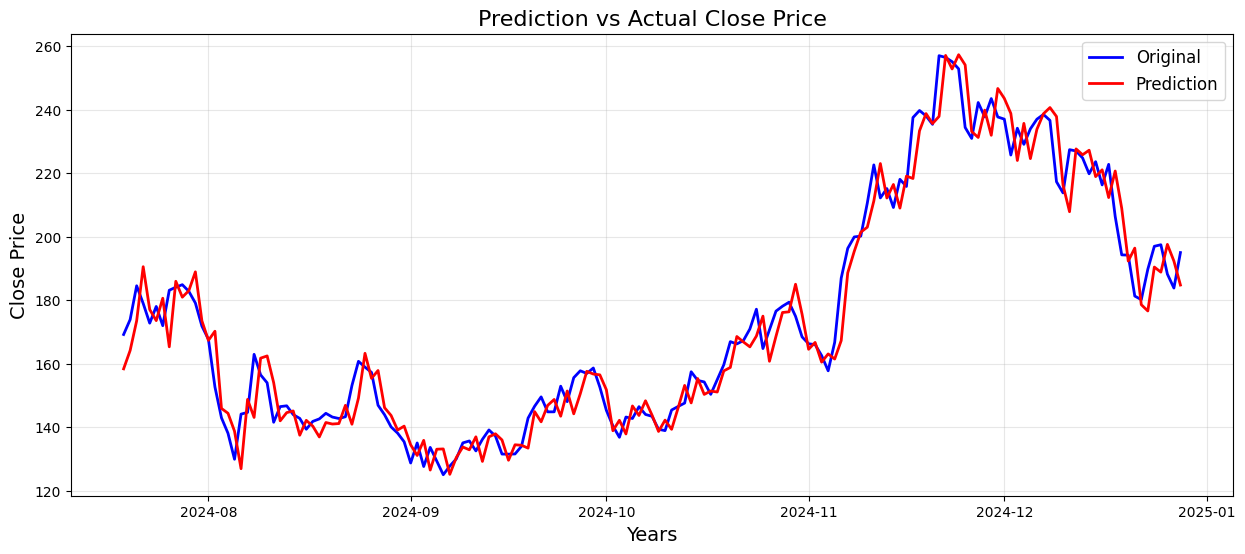

In [24]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [25]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1)
future_predictions=[]
for _ in range(10):
    next_days = models['Linear Regression'].predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:], next_days.reshape(1, 1), axis = 1)

In [26]:
future_predictions

[array([[193.61446125]]),
 array([[189.58123647]]),
 array([[186.8390129]]),
 array([[191.01462992]]),
 array([[191.77621014]]),
 array([[192.78282863]]),
 array([[192.65154301]]),
 array([[193.42897884]]),
 array([[190.9887673]]),
 array([[190.82595487]])]

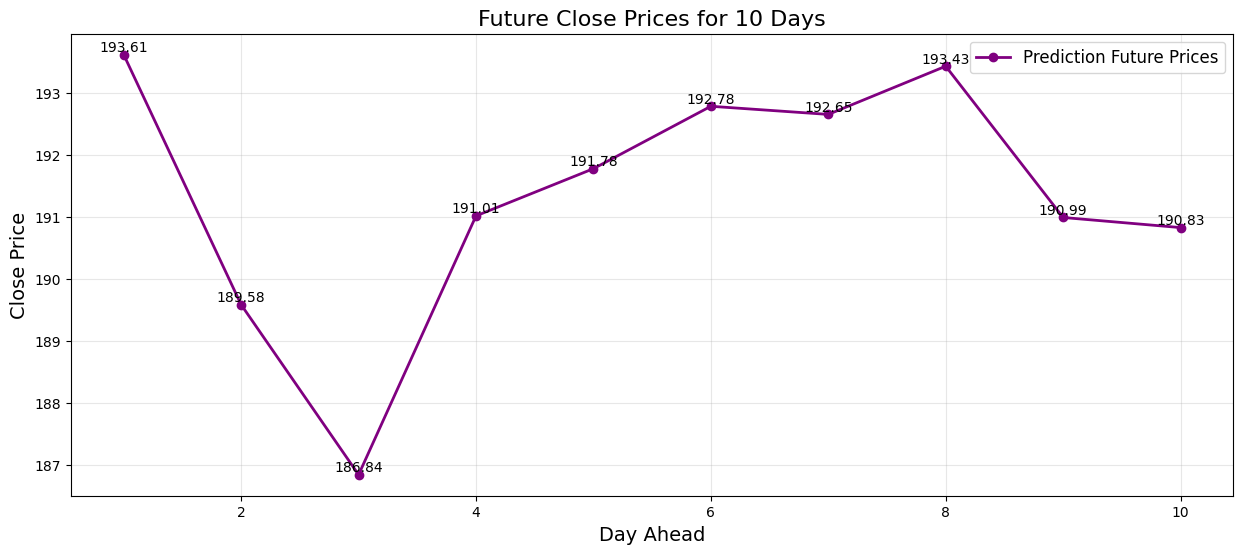

In [27]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [30]:
# Save last_100 to a .npy file
np.save('last_100.npy', last_100)

# Download the saved file
files.download('last_100.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import joblib

# Save the model and scaler
joblib.dump(models['Linear Regression'], 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [29]:
from google.colab import files

# Download the saved files
files.download('linear_regression_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
sklearn.__version__

'1.6.0'